# Question 1:

Shuffling and writing examples to /root/tensorflow_datasets/malaria/1.0.0.incompleteQQZSVX/malaria-train.tfrecord


Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


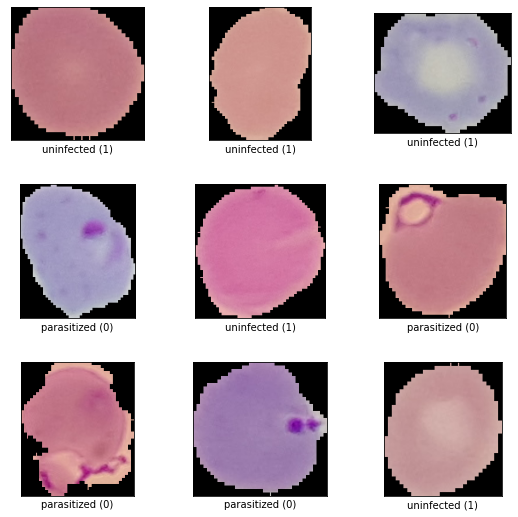

24802


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.660798279801102


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy after kfold:  0.6838709677419355


In [1]:
import os
import numpy as np
from numpy import zeros, newaxis
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import cv2
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#Loading data and visualizing it:
ds, metadata = tfds.load('malaria', split='train[:90%]', shuffle_files=True, with_info=True)
vis = tfds.visualization.show_examples(ds, metadata)

#Preprocessing data:
data = []
classes = []
for i in ds:
  image = tfds.as_numpy(i["image"])
  label = tfds.as_numpy(i["label"])
  image = cv2.resize(image, (96,96), interpolation =  cv2.INTER_LANCZOS4)
  image = image.astype('float32')
  # normalize to the range 0-1
  image = image/255.0
  data.append(image)
  classes.append(label)

data = np.array(data)
label = np.array(classes)

#Flattening of data:
data = [x.flatten() for x in data]
print(len(data))

#Splitting dataset into training and test set and training Logistic regression model and computing its accuracy:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=0)
logisticRegr = LogisticRegression().fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print('Accuracy: ',score)

#Performing kfold cross validation to further improve accuracy:
result = cross_val_score(LogisticRegression(), data, label, cv=10)
print('Accuracy after kfold: ', max(result))

# Question 2

170500096/170498071 [==============================] - 4s 0us/step


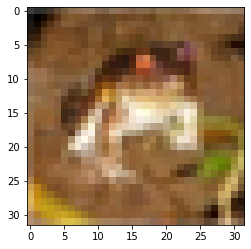

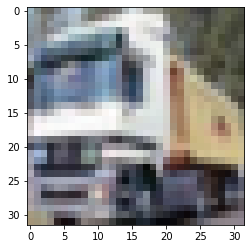

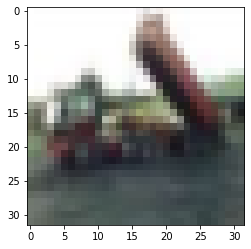

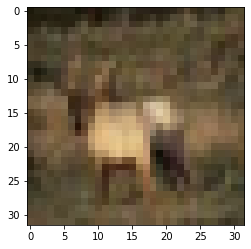

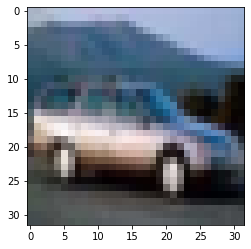

In [2]:
from keras.datasets import cifar10
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
for i in range(5):
  plt.imshow(xtrain[i])
  plt.show()

# Question 3:

In [3]:
def filt(input_img, filter_arr, pad, norm):
  pf = int((filter_arr.shape[0] - 1)/2)
  print('pf: ', pf)
  if len(input_img.shape) < 3:
    no_of_channel = 1
  else:
    no_of_channel = 3
  if pad == True:
    if no_of_channel == 3: 
      #Temperory array of zeros is formed in which later input image will be embedded:
      temp = np.zeros((input_img.shape[0]+2*pf, input_img.shape[1]+2*pf, no_of_channel), dtype='float32')
      for i in range(len(input_img)):
        for j in range(len(input_img[i])):
          temp[i+pf][j+pf] = input_img[i][j]
      input_img = temp
      output_img = np.zeros((input_img.shape[0], input_img.shape[1], no_of_channel), dtype='float32')
    else:
      input_img = np.pad(input_img, ((pf,pf),(pf,pf)), mode='constant')
      output_img = np.zeros((input_img.shape[0], input_img.shape[1], no_of_channel), dtype='float32')
  else:
    if no_of_channel == 3:
      output_img = np.zeros((input_img.shape[0]-filter_arr.shape[0]+1, input_img.shape[1]-filter_arr.shape[0]+1, no_of_channel), dtype='float32')
      input_img = input_img
    else:
      output_img = np.zeros((input_img.shape[0] - 2*pf, input_img.shape[1] - 2*pf, no_of_channel))
  for i in range(input_img.shape[0]):
    for j in range(input_img.shape[1]):
        if i-pf>=0 and i+pf<input_img.shape[0]:
            if j-pf>=0 and j+pf<input_img.shape[1]:
              #For RGB images:
              if no_of_channel == 3:
                  temp = input_img[i-pf:i+pf+1]
                  sliced_matrix = []
                  for num in range(len(temp)):
                      sliced_matrix.append(temp[num][j-pf:j+pf+1])
                  avg1 = 0
                  avg2 = 0
                  avg3 = 0
                  #Sum of product of corresponding element is performed:
                  for m in range(len(sliced_matrix)):
                      for n in range(len(sliced_matrix[m])):
                          arr = sliced_matrix[m][n]
                          avg1+=arr[0]*filter_arr[m][n]
                          avg2+=arr[1]*filter_arr[m][n]
                          avg3+=arr[2]*filter_arr[m][n]
                  output_img[i-pf][j-pf][0]=avg1
                  output_img[i-pf][j-pf][1]=avg2
                  output_img[i-pf][j-pf][2]=avg3
              #For grayscale images:
              else:
                sliced_matrix = []
                temp = input_img[i-pf:i+pf+1]
                for num in range(len(temp)):
                    sliced_matrix.append(temp[num][j-pf:j+pf+1]) 
                sum=0
                for m in range(len(sliced_matrix)):
                    for n in range(len(sliced_matrix[m])):
                        sum = sum+sliced_matrix[m][n]*filter_arr[m][n]
                output_img[i-pf][j-pf]=sum
  if norm == True:
    output_img = output_img/np.max(output_img)
  return output_img

pf:  4
pf:  4
pf:  4
pf:  4


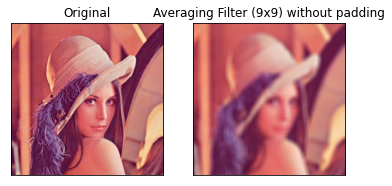

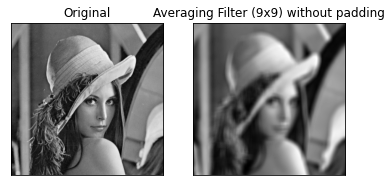

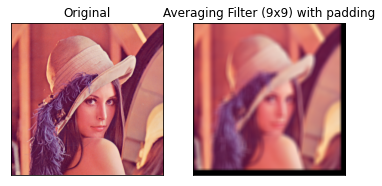

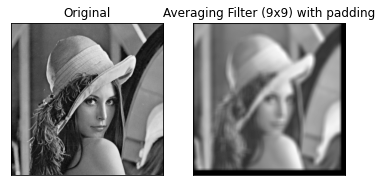

In [5]:
org_img = plt.imread('lena_color_256.tif')
rgb_img = np.array(org_img, dtype='float32')
gray_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
gray_img = np.array(gray_img)
filter = [[1/81 for i in range(9)] for j in range(9)] #Averaging filter
#filter = np.array([[1,2,1], [0,0,0], [-1,-2,-1]]) #Sobel filter
filter = np.array(filter)
filt1 = filt(rgb_img, filter, False, True)
filt2 = filt(gray_img, filter, False, True)
filt3 = filt(rgb_img, filter, True, True)
filt4 = filt(gray_img, filter, True, True)

plt.subplot(121),plt.imshow(org_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filt1),plt.title('Averaging Filter (9x9) without padding')
plt.xticks([]), plt.yticks([])
plt.show()

filt2 = filt2.reshape((filt2.shape[0],filt2.shape[1]*filt2.shape[2]))
plt.subplot(121),plt.imshow(gray_img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filt2,cmap='gray'),plt.title('Averaging Filter (9x9) without padding')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(org_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filt3),plt.title('Averaging Filter (9x9) with padding')
plt.xticks([]), plt.yticks([])
plt.show()

filt4 = filt4.reshape((filt4.shape[0],filt4.shape[1]*filt4.shape[2]))
plt.subplot(121),plt.imshow(gray_img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filt4,cmap='gray'),plt.title('Averaging Filter (9x9) with padding')
plt.xticks([]), plt.yticks([])
plt.show()

# Question 4:

In [6]:
from keras.datasets import cifar10
import sklearn.metrics as skm
from skimage.feature import hog
from sklearn import svm

# load dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
xtrain_hog = []
xtest_hog = []

#Extracting hog feature descriptor (fd) of every image in the dataset:
for i in xtrain:
  fd, hog_image = hog(i, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
  xtrain_hog.append(fd)
for j in xtest:
  fd, hog_image = hog(j, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
  xtest_hog.append(fd)
xtrain = np.array(xtrain_hog)
xtest = np.array(xtest_hog)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

#Feeding fd to the linear SVM classifier:
clf = svm.SVC(kernel='linear', C = 1.0, verbose=True, max_iter=10000, cache_size=1000, gamma=0.001)
clf.fit(xtrain,ytrain)

#Computing test accuracy of linear SVM:
ypredict = clf.predict(xtest)
acc = skm.accuracy_score(ytest, ypredict, normalize=True)
print(acc)

(50000, 324)
(10000, 324)
(50000, 1)
(10000, 1)
[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.5428


# Question 5:

## Part a (Feedforward Neural Network)

In [7]:
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD
from keras.regularizers import l1, l2, l1_l2
import numpy as np
import cv2
import matplotlib.pyplot as plt

# load dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(xtrain.shape)
print(xtest.shape)

#Data pre-processing:
xtrain_temp = []
xtest_temp = []
for i in range(len(xtrain)):
  gray = xtrain[i].astype('float32')
  temp = gray/255.0
  xtrain_temp.append(temp)
for j in range(len(xtest)):
  gray = xtest[j].astype('float32')
  temp2 = gray/255.0
  xtest_temp.append(temp2)
xtrain = np.array(xtrain_temp, dtype='float32')
xtest = np.array(xtest_temp, dtype='float32')
print(xtrain.shape)
print(xtest.shape)

#Data flattening:
xtrain = xtrain.reshape((-1, 3*1024))
xtest = xtest.reshape((-1, 3*1024))
print(xtrain.shape)
print(xtest.shape)

#Defining sequential Feedforward model:
model = Sequential([
  Dense(1536, activation='relu'),
  Dense(768, activation='relu'),
  Dense(384, activation='relu'),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history = model.fit(xtrain, ytrain, epochs=100, verbose=1, validation_data=(xtest, ytest), batch_size=40)
model.summary()

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 3072)
(10000, 3072)
Epoch 1/100
1250/1250 [==============================] - 7s 3ms/step - loss: 1.9931 - accuracy: 0.2757 - val_loss: 1.6957 - val_accuracy: 0.3969
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6857 - accuracy: 0.3983 - val_loss: 1.7225 - val_accuracy: 0.3764
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5841 - accuracy: 0.4357 - val_loss: 1.5579 - val_accuracy: 0.4466
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5192 - accuracy: 0.4594 - val_loss: 1.6302 - val_accuracy: 0.4265
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4593 - accuracy: 0.4783 - val_loss: 1.4299 - val_accuracy: 0.4875
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4193 - accuracy: 0.4949 - val_loss: 1.4583 - val_accuracy: 0.4894
Epoch 7/100
1250/1250 [===

In [ ]:
#Plotting learning curves:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#Calculating training and test accuracy:
result = model.evaluate(xtrain, ytrain)
print('train loss, train acc:', result)
result2 = model.evaluate(xtest, ytest)
print('test loss, test acc:', result2)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.0014 - accuracy: 0.9998
train loss, train acc: [0.0013697778340429068, 0.9998000264167786]
313/313 [==============================] - 1s 3ms/step - loss: 3.6675 - accuracy: 0.5755
test loss, test acc: [3.667506217956543, 0.5755000114440918]


In [9]:
#Saving model:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Part b (CNN)

In [10]:
from keras.datasets import cifar10
import numpy as np
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt

# load dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

#OneHot encoding:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(xtrain.shape)
print(xtest.shape)

#Data preprocessing:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain = xtrain / 255.0
xtest = xtest / 255.0

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
#Defining CNN architecture:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=50, verbose=1, validation_data=(xtest, ytest))
model.summary()

Epoch 1/50
1563/1563 [==============================] - 40s 6ms/step - loss: 2.0780 - accuracy: 0.2257 - val_loss: 1.5646 - val_accuracy: 0.4375
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5748 - accuracy: 0.4200 - val_loss: 1.3804 - val_accuracy: 0.4962
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3953 - accuracy: 0.4930 - val_loss: 1.2025 - val_accuracy: 0.5676
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2551 - accuracy: 0.5456 - val_loss: 1.1089 - val_accuracy: 0.6086
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5838 - val_loss: 0.9923 - val_accuracy: 0.6481
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0676 - accuracy: 0.6198 - val_loss: 0.9876 - val_accuracy: 0.6438
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0051 - accuracy: 0.6420 - val_loss: 0.9395 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


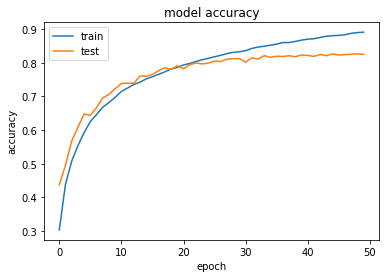

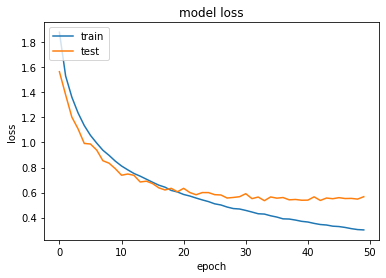

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
result = model.evaluate(xtrain, ytrain)
print('train loss, train acc:', result)
result2 = model.evaluate(xtest, ytest)
print('test loss, test acc:', result2)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.1262 - accuracy: 0.9641
train loss, train acc: [0.12616005539894104, 0.9640799760818481]
313/313 [==============================] - 1s 3ms/step - loss: 0.5672 - accuracy: 0.8251
test loss, test acc: [0.5672266483306885, 0.8251000046730042]


## Part c (VGG16 + Feedforward NN):

In [14]:
from keras.layers import Input, Lambda, Dense, Flatten, UpSampling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras import layers
from keras.datasets import cifar10
import numpy as np
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt

# load dataset
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(xtrain.shape)
print(xtest.shape)

#Data preprocessing:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain = xtrain / 255.0
xtest = xtest / 255.0

#Initializing VGG16 model and freezing all the layers to avoid retraining and changing the input shape:
vgg_model = VGG16(input_shape=(64, 64, 3), weights='imagenet', include_top=False)
print(vgg_model.summary())
for layer in vgg_model.layers:
  layer.trainable = False

#Stacking VGG16 model over Feedforward network:
model = Sequential()
model.add(UpSampling2D())
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(xtrain, ytrain, epochs=5, verbose=1, validation_data=(xtest, ytest), shuffle=True)
model.summary()

(50000, 32, 32, 3)
(10000, 32, 32, 3)
58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
________________________

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


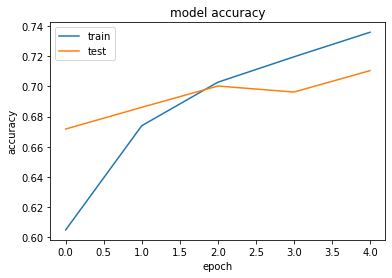

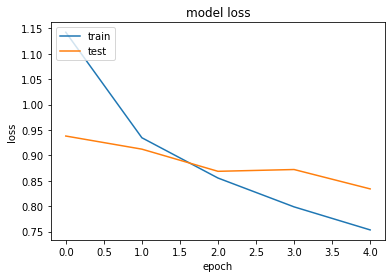

In [15]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#Computing training and testing accuracy:
result = model.evaluate(xtrain, ytrain)
print('train loss, train acc:', result)
result2 = model.evaluate(xtest, ytest)
print('test loss, test acc:', result2)

1563/1563 [==============================] - 23s 15ms/step - loss: 0.6242 - accuracy: 0.7791
train loss, train acc: [0.6241569519042969, 0.7791000008583069]
313/313 [==============================] - 5s 15ms/step - loss: 0.8340 - accuracy: 0.7105
test loss, test acc: [0.834000289440155, 0.7105000019073486]
